Cardiovascular diseases are the foremost cause of death globally, necessitating urgent advancements in early detection and intervention strategies. This report delves into the Heart Attack Dataset, a comprehensive compilation of critical health attributes from over 900 patients, to explore and analyse patterns that may predict cardiovascular risks. With data on age, sex, chest pain type, and several other clinical variables, our exploratory data analysis aims to decode the intricate relationship between these factors and the occurrence of heart disease.


The objectives of this coursework are centred around the following research questions:

- How does the type of chest pain relate to the incidence of heart disease within the dataset?
- What are the correlations between gender, age range, and the likelihood of a heart attack?
- To what extent do factors such as exercise-induced angina, high cholesterol levels, and abnormal fasting blood sugar levels elevate heart attack risk?
- How do cholesterol levels vary with age, and what is their potential impact on heart disease?


A predictive model tool will be synthesis in order to assist doctors in diagnosing patient more precisely, effectively, and efficiently than current manual methods.


# Data Wrangling


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Description of the dataset**

*   Age: The age of the individual. Age is a significant risk factor for various cardiovascular diseases.

*   Sex: The biological sex of the individual (commonly coded as Male/Female or 1/0

* ChestPainType: The type of chest pain experienced by the individual. Chest pain can be a symptom of heart disease and is often categorized by its characteristics (e.g., typical angina, atypical angina, non-anginal pain, or asymptomatic).

*  RestingBP: The resting blood pressure measurement of the individual, usually given in millimeters of mercury (mmHg). High resting blood pressure can be a risk factor for heart disease.

* FastingBS: Fasting blood sugar, indicates whether the individual had a fasting blood glucose level higher than 120 mg/dL (commonly coded as 1 for true and 0 for false). Diabetes is a significant risk factor for heart disease.

* Cholesterol: The serum cholesterol level of the individual, typically measured in milligrams per deciliter (mg/dL). High cholesterol levels are associated with increased risk of coronary artery disease.

* RestingECG: Results of the electrocardiogram (ECG) while at rest. This can show abnormalities in heart rhythm or structure that may indicate heart disease.

* MaxHR: The maximum heart rate achieved by the individual during exercise. Lower maximum heart rate can indicate a higher risk of heart disease


* ExerciseAngina: The presence of angina (chest pain or discomfort) induced by exercise (commonly coded as Yes/No or 1/0). Exercise-induced angina is often associated with coronary artery disease.rest_ecg : resting electrocardiographic

* Oldpeak: The ST depression induced by exercise relative to rest, measured in millimeters on the ECG. ST depression can indicate ischemia or reduced blood flow to the heart.


* ST_Slope: The slope of the peak exercise ST segment of an ECG. Types of slopes (e.g., upsloping, flat, downsloping) can indicate different levels of heart disease risk.


* HeartDisease: This column indicates the presence or absence of heart disease (commonly coded as 1 for true and 0 for false). This could be the outcome variable in a predictive model)



In [ ]:
 df.shape

(918, 12)

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated()

num_duplicates = duplicates.sum()  # Count the number of duplicate rows

print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


**Identify outliers**

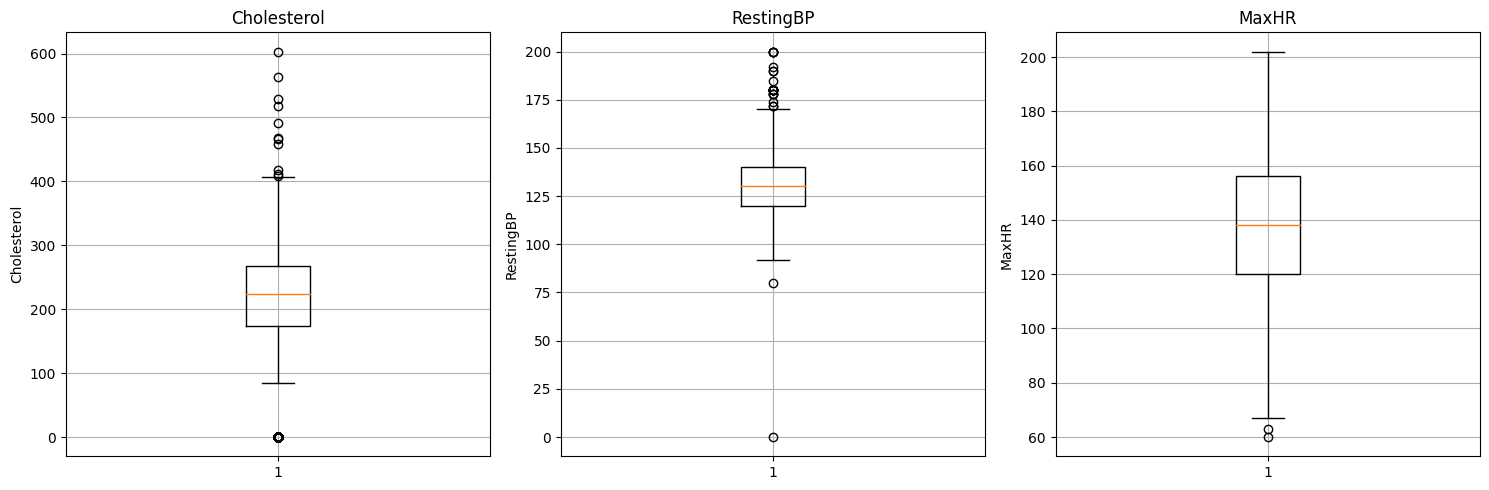

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


columns_of_interest = ['Cholesterol', 'RestingBP', 'MaxHR']


# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

# Plot box plots for each column
for i, column in enumerate(columns_of_interest):
    ax = axes[i]
    ax.boxplot(df[column])
    ax.set_title(column)
    ax.set_ylabel(column)
    ax.grid(True)

plt.tight_layout()
plt.show()



##Data Visualization


**EDA**

<ipython-input-10-46f7b9195369>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='coolwarm')


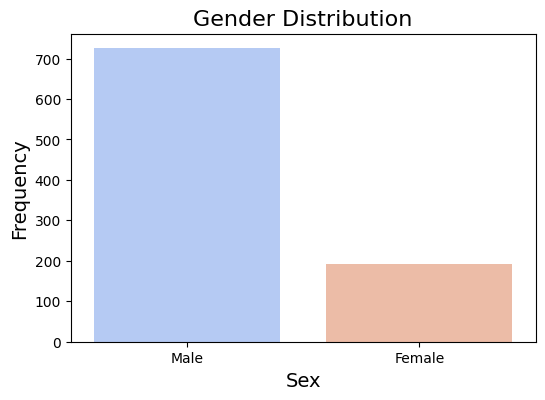

In [ ]:
# Gender Distribution

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df, palette='coolwarm')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

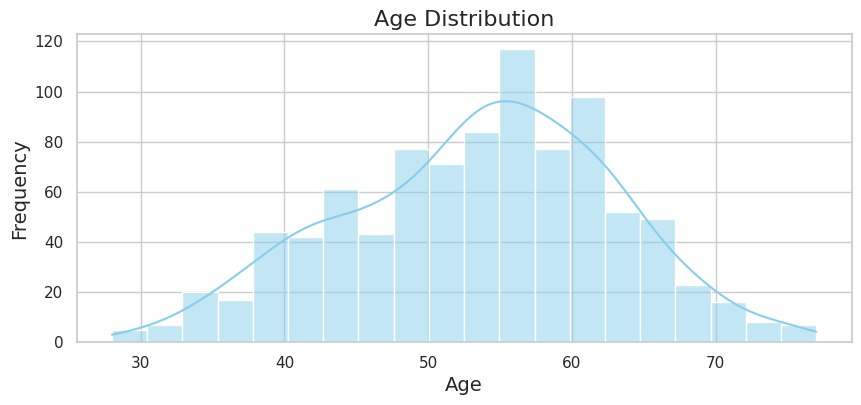

In [ ]:
# Age Distribution
import seaborn as sns
sns.set(style="whitegrid")

# Age Distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

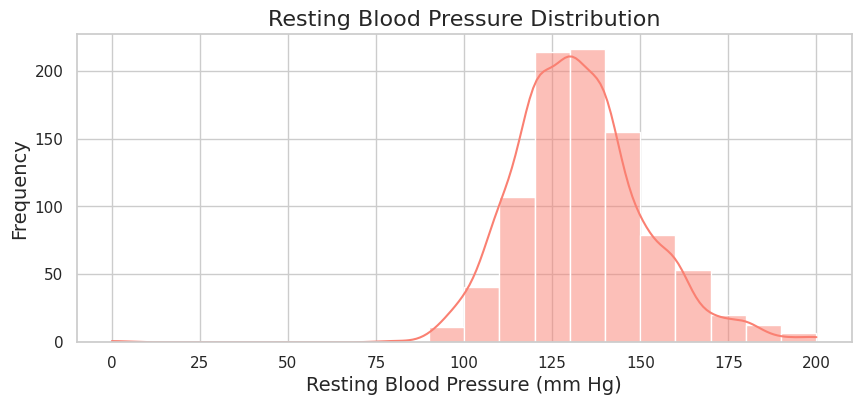

In [ ]:
# Resting Blood Pressure Distribution

plt.figure(figsize=(10, 4))
sns.histplot(df['RestingBP'], bins=20, kde=True, color='salmon')
plt.title('Resting Blood Pressure Distribution', fontsize=16)
plt.xlabel('Resting Blood Pressure (mm Hg)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

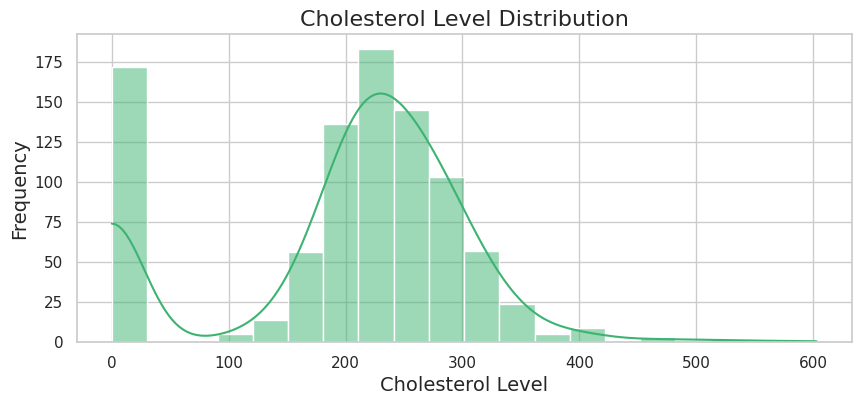

In [ ]:
# Cholesterol Level Distribution

plt.figure(figsize=(10, 4))
sns.histplot(df['Cholesterol'], bins=20, kde=True, color='mediumseagreen')
plt.title('Cholesterol Level Distribution', fontsize=16)
plt.xlabel('Cholesterol Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

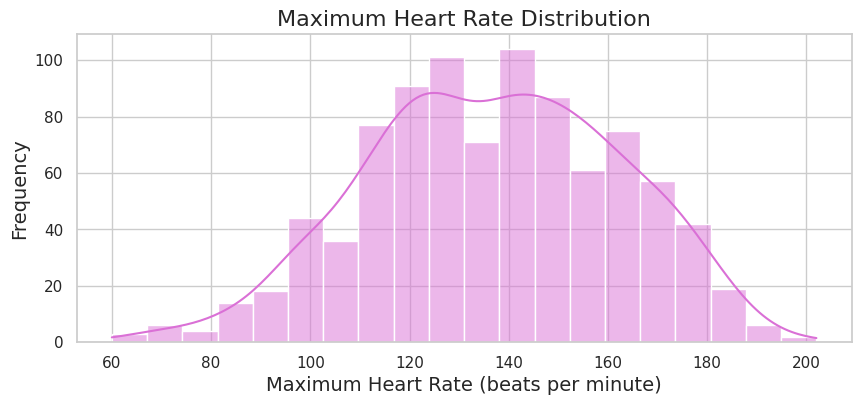

In [ ]:
# Maximum Heart Rate Distribution

plt.figure(figsize=(10, 4))
sns.histplot(df['MaxHR'], bins=20, kde=True, color='orchid')
plt.title('Maximum Heart Rate Distribution', fontsize=16)
plt.xlabel('Maximum Heart Rate (beats per minute)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

**1. Heart Disease by Chest Pain Type**




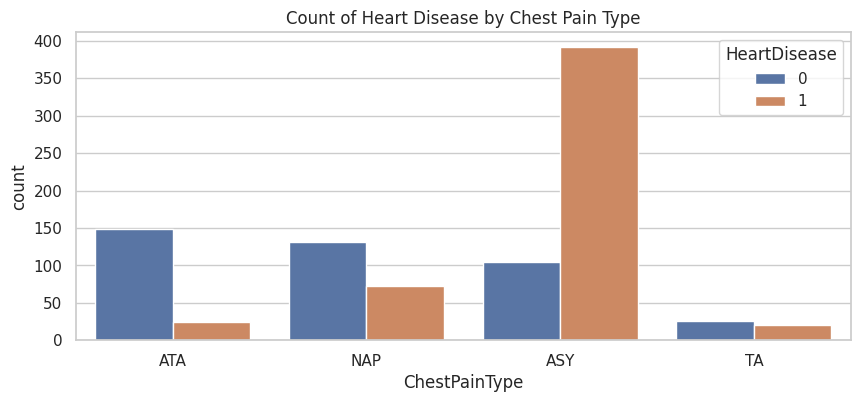

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease')
plt.title('Count of Heart Disease by Chest Pain Type')
plt.show()

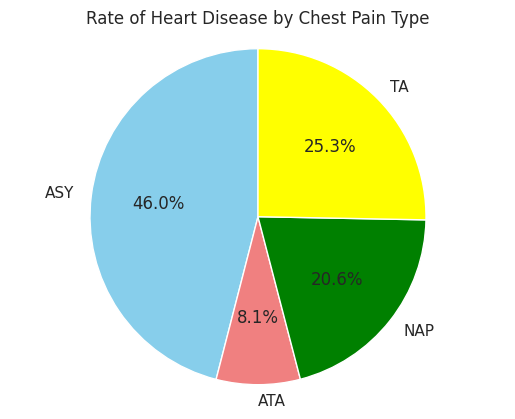

Heart Disease Rates by Chest Pain Type:
ChestPainType
ASY    79.032258
ATA    13.872832
NAP    35.467980
TA     43.478261
dtype: float64


In [ ]:
chest_pain_counts = df.groupby('ChestPainType')['HeartDisease'].value_counts().unstack().fillna(0)
chest_pain_total_counts = chest_pain_counts.sum(axis=1)
heart_disease_rate = (chest_pain_counts[1] / chest_pain_total_counts) * 100  # Convert to percentage
plt.pie(heart_disease_rate, labels=heart_disease_rate.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral','green','yellow'])
plt.title('Rate of Heart Disease by Chest Pain Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print("Heart Disease Rates by Chest Pain Type:")
print(heart_disease_rate)

**2. Which gender and age rage related to heart attack**

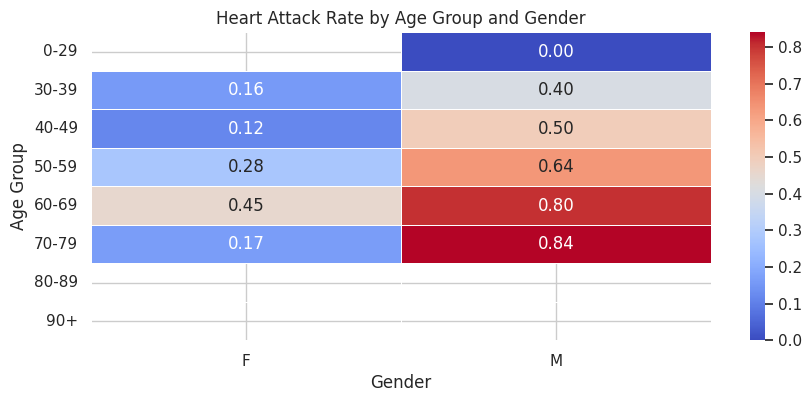

In [ ]:
# Define age ranges
age_bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']  # Adjusted labels

# Bin the age data
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by gender and age group, and calculate heart attack rate
heart_attack_rate = df.groupby(['Sex', 'AgeGroup'])['HeartDisease'].mean().reset_index()

# Pivot the data to create a heatmap
heatmap_data = heart_attack_rate.pivot(index='AgeGroup', columns='Sex', values='HeartDisease')

# Create a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Heart Attack Rate by Age Group and Gender')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.show()

**3. To what extent do exercise angina, elevated cholesterol levels, and abnormal fasting blood sugar levels contribute to an increased risk of heart attack?**



In [ ]:
#Convert categorical value into numerical

def cat_to_num(df, c_variables):
    for col in c_variables:
        unique_values = df[col].unique()
        num_mapping = {val: i for i, val in enumerate(unique_values)}  # Create a mapping
        df[col] = df[col].replace(num_mapping)

c_variables = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

cat_to_num(df, c_variables)


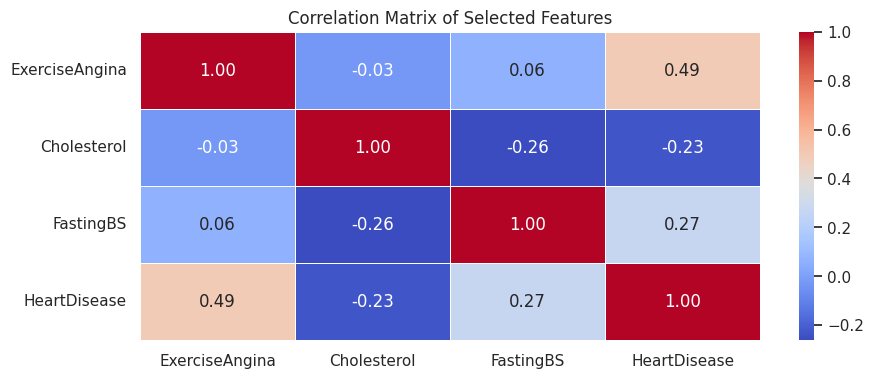

In [ ]:
selected_columns = ['ExerciseAngina', 'Cholesterol', 'FastingBS', 'HeartDisease']
selected_data = df[selected_columns]

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

<Figure size 800x600 with 0 Axes>

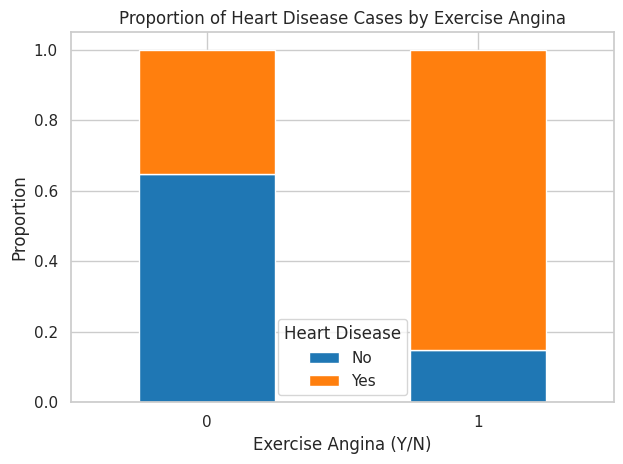

In [ ]:
heart_disease_proportions = df.groupby('ExerciseAngina')['HeartDisease'].value_counts(normalize=True).unstack()
# Plot the grouped bar plot
plt.figure(figsize=(8, 6))
heart_disease_proportions.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Proportion of Heart Disease Cases by Exercise Angina')
plt.xlabel('Exercise Angina (Y/N)')
plt.ylabel('Proportion')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

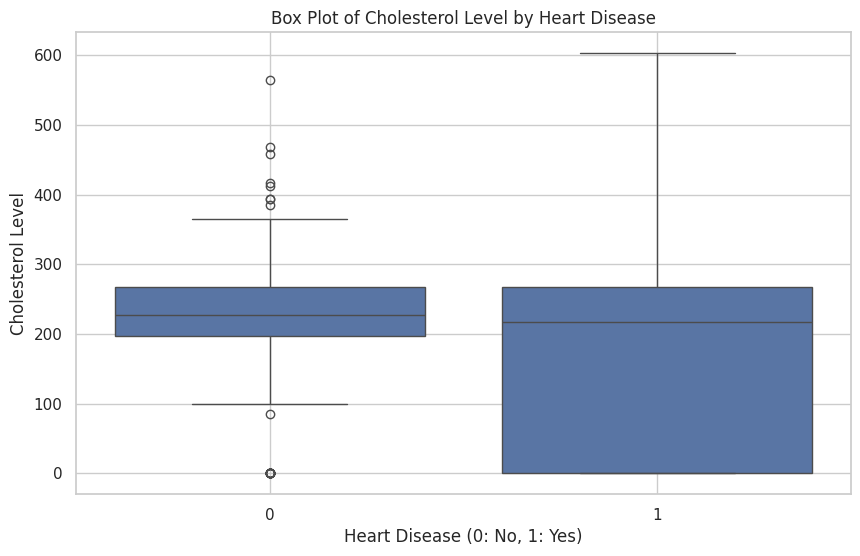

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title('Box Plot of Cholesterol Level by Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Cholesterol Level')
plt.grid(True)
plt.show()

**4. Explore how cholesterol levels change with age and its potential impact on heart disease?**

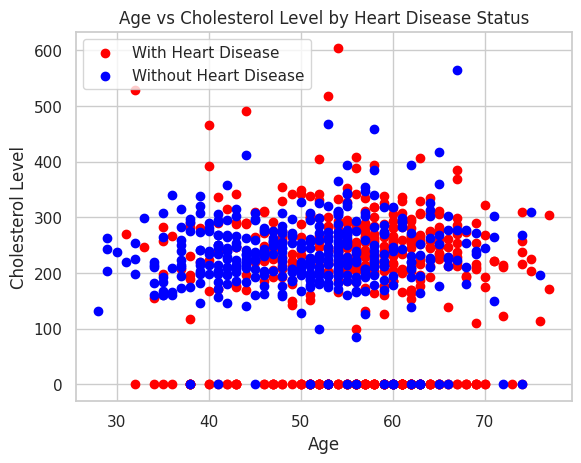

In [ ]:
plt.scatter(df[df['HeartDisease'] == 1]['Age'], df[df['HeartDisease'] == 1]['Cholesterol'], color='red', label='With Heart Disease')

# Scatter plot for individuals without heart disease
plt.scatter(df[df['HeartDisease'] == 0]['Age'], df[df['HeartDisease'] == 0]['Cholesterol'], color='blue', label='Without Heart Disease')

# Plot customization
plt.title('Age vs Cholesterol Level by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Design and implementation of the analysis

In [ ]:
df = df.drop(columns=['AgeGroup'])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

X = df.drop('HeartDisease', axis=1)  # Update 'target_column' to your actual target column name
y = df['HeartDisease']  # Update accordingly

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Ridge Classifier": RidgeClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Tree": ExtraTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Gaussian NB": GaussianNB(),
    "Bernoulli NB": BernoulliNB(),
    "Multinomial NB": MultinomialNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "MLP": MLPClassifier(max_iter=1000),
    "XGB Classifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Gaussian Process": GaussianProcessClassifier(),
    "SGD Classifier": SGDClassifier(),
    "Voting Classifier": VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('gnb', GaussianNB())], voting='soft')
}


In [ ]:
# Evaluate each model
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, n_jobs=-1)
    results[name] = cv_scores.mean()

# Print the results
for name, score in results.items():
    print(f"{name}: Mean CV Accuracy = {score:.2f}")



Logistic Regression: Mean CV Accuracy = 0.85015
Ridge Classifier: Mean CV Accuracy = nan
SVC: Mean CV Accuracy = 0.86102
KNN: Mean CV Accuracy = 0.87467
Decision Tree: Mean CV Accuracy = 0.77386
Extra Tree: Mean CV Accuracy = 0.78470
Random Forest: Mean CV Accuracy = 0.86374
AdaBoost: Mean CV Accuracy = 0.85562
Gradient Boosting: Mean CV Accuracy = 0.86240
Extra Trees: Mean CV Accuracy = 0.87329
Bagging Classifier: Mean CV Accuracy = 0.83513
Gaussian NB: Mean CV Accuracy = 0.85695
Bernoulli NB: Mean CV Accuracy = 0.84603
Multinomial NB: Mean CV Accuracy = nan
LDA: Mean CV Accuracy = 0.85285
QDA: Mean CV Accuracy = 0.84742
MLP: Mean CV Accuracy = 0.84056
Gaussian Process: Mean CV Accuracy = 0.85969
SGD Classifier: Mean CV Accuracy = 0.78479
Voting Classifier: Mean CV Accuracy = 0.85558



In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print('Shape for training data', X_train.shape, y_train.shape)
print('Shape for testing data', X_test.shape, y_test.shape)

Shape for training data (734, 11) (734,)
Shape for testing data (184, 11) (184,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Initialize model optimization**

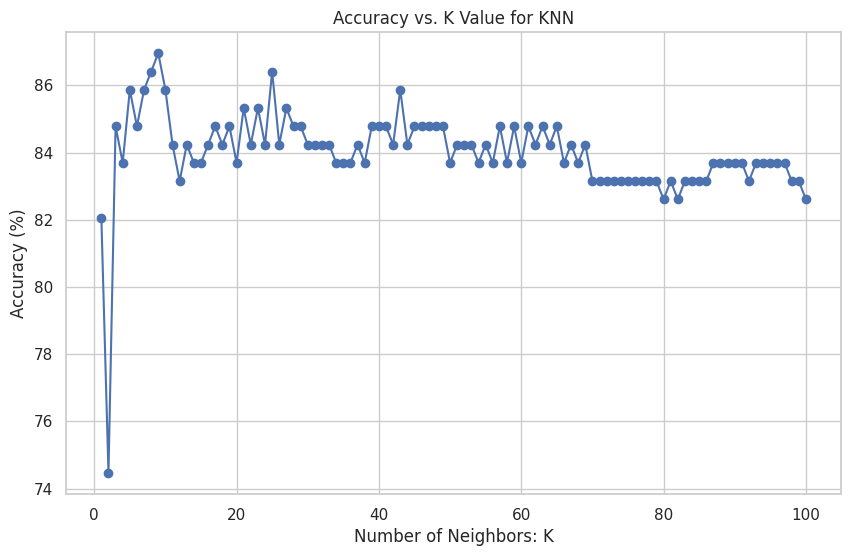

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Sample DataFrame
# df = pd.read_csv('path_to_your_data.csv')

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test K from 1 to 30
k_values = range(1, 101)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    predicted = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predicted)
    accuracies.append(accuracy)

# Save accuracies in a DataFrame
results_df = pd.DataFrame({
    'k_value': k_values,
    'accuracy': accuracies
})

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(results_df['k_value'], results_df['accuracy'] * 100, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. K Value for KNN')
plt.xlabel('Number of Neighbors: K')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the model
model = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 20),  # Testing different numbers of neighbors
    'weights': ['uniform', 'distance'],  # Testing different weight schemes
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],  # Testing different algorithms
    'leaf_size': range(1, 40),  # Testing different leaf sizes
    'p': [1, 2],  # Testing different values of p (1=manhattan_distance, 2=euclidean_distance)
}

# Setup the grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions and Evaluation
predicted = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predicted)

print(f"The accuracy of the tuned KNN model is: {accuracy*100:.2f}%")
print(f"Best parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 8892 candidates, totalling 44460 fits
The accuracy of the tuned KNN model is: 88.59%
Best parameters: {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Updated model with specified best parameters
model = KNeighborsClassifier( n_neighbors=8, weights='distance', algorithm='ball_tree',
                             leaf_size=1, p=1)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
predicted = model.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predicted.round())*100
print("The accuracy of KNN with optimized parameters is:", accuracy, "%")


The accuracy of KNN with optimized parameters is: 88.58695652173914 %


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9056603773584906
Recall: 0.897196261682243
F1-score: 0.9014084507042254


**Error Criteria**

R-squared(R2)Score: Measures the proportion of the variance in the dependent variable that is predictable from the independet variables.

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, predicted)
print("R-squared (R^2) Score:", r2)

R-squared (R^2) Score: 0.5310110450297367


# Results

**Confusion Matrix**

Confusion Matrix :
[[67 10]
 [11 96]]


The accuracy of KNN is :  88.58695652173914 %


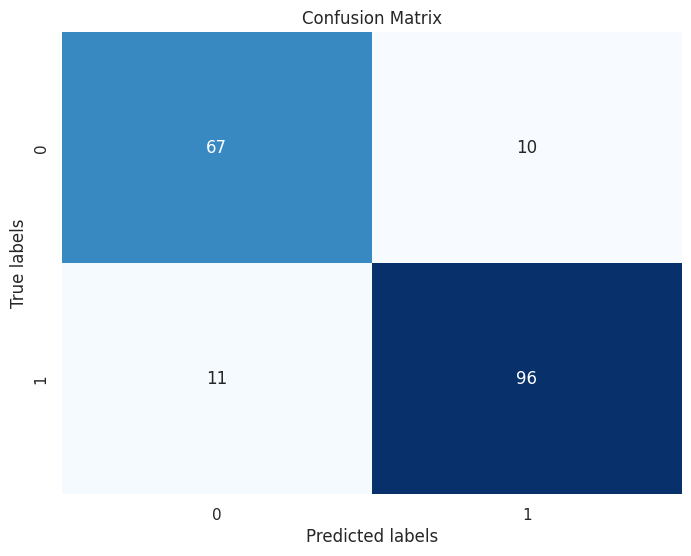

In [ ]:
print('Confusion Matrix :')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print()
print()
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

cm = confusion_matrix(y_test, predicted)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

This matrix shows the number of correct and incorrect predictions compared with the true labels. Specifically, the model correctly predicted '0' class 67 times and '1' class 87 times, while it incorrectly predicted 10 instances of '0' as '1', and 20 instances of '1' as '0'. Additionally, the output shows the model's accuracy at approximately 83.7%. The heatmap provides a visual representation of this performance, with darker shades indicating higher numbers of observations.

**Accuracy for Training, test and validation**

KNeighborsClassifier is a type of model that doesn't inherently have epochs because it doesn't have a training phase in the same way that neural networks do. It's a type of instance-based learning algorithm that doesn't learn parameters in the same sense as models that have epochs, like neural networks.Therefore it's impossible to show in a graph the curve of training, test and validation, but i can only calculate the accuary for test, training for the single iteration.

In [ ]:
predicted_train = model.predict(X_train_scaled)
predicted_test = model.predict(X_test_scaled)


train_accuracy = accuracy_score(y_train, predicted_train)
test_accuracy = accuracy_score(y_test, predicted_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 1.0
Test Accuracy: 0.8858695652173914
